<a href="https://colab.research.google.com/github/swapniel99/erav1s9/blob/develop/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade torchinfo albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [2]:
!git clone https://github.com/swapniel99/erav1s9.git
%cd erav1s9/
!git checkout develop
!git pull
%ls

Cloning into 'erav1s9'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 197 (delta 14), reused 13 (delta 11), pack-reused 174
Receiving objects: 100% (197/197), 2.00 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/erav1s9
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
Already up to date.
assets/      datasets/  README.md         S9.ipynb    utils.py
backprop.py  model.py   requirements.txt  summary.py


In [3]:
from utils import *
set_seed(42)

Device Selected: cuda


In [4]:
from datasets import CIFAR10
from torchvision import transforms
batch_size = 32
cifar10 = CIFAR10(batch_size)

100%|██████████| 170498071/170498071 [00:03<00:00, 49278871.47it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


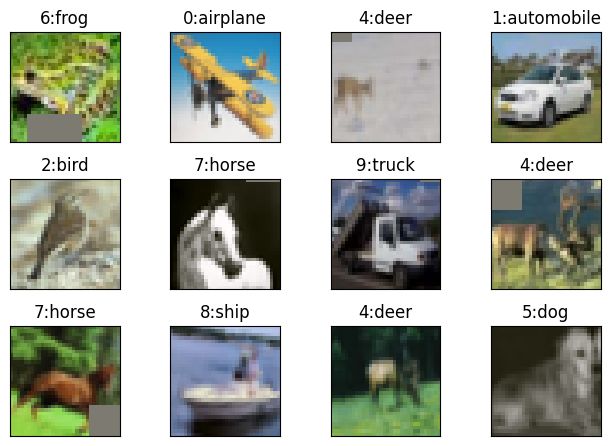

In [5]:
cifar10.show_examples()

In [6]:
from backprop import Experiment

In [7]:
from model import Model

In [8]:
model1 = Model(skip=True, dropout=0.01)
model1.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model                                    [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 32, 32, 32]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 32, 32, 32]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 32, 32, 32]          864                         0.44%
│    │    └─BatchNorm2d: 3-2             [32, 32, 32, 32]          [32, 32, 32, 32]          64                          0.03%
│    │    └─ReLU: 3-3                    [32, 32, 32, 32]          [32, 32, 32, 32]          --                             --
│    │    └─Dropout: 3-4                 [32, 32, 32, 32]          [32, 32, 32, 32]          --                

In [9]:
exp1 = Experiment(model1, cifar10, lr=0.01)
exp1.execute(epochs=100, target=85)

Epoch 1


Train: Average Loss: 1.4384, Accuracy: 48.77: 100%|██████████| 1563/1563 [00:40<00:00, 39.07it/s]


Test:  Average loss: 1.0832, Accuracy: 63.16
Epoch 2


Train: Average Loss: 1.1137, Accuracy: 60.92: 100%|██████████| 1563/1563 [00:37<00:00, 41.47it/s]


Test:  Average loss: 0.9393, Accuracy: 66.57
Epoch 3


Train: Average Loss: 0.9869, Accuracy: 65.40: 100%|██████████| 1563/1563 [00:38<00:00, 41.00it/s]


Test:  Average loss: 0.8080, Accuracy: 71.93
Epoch 4


Train: Average Loss: 0.9075, Accuracy: 68.11: 100%|██████████| 1563/1563 [00:37<00:00, 41.33it/s]


Test:  Average loss: 0.8726, Accuracy: 71.78
Epoch 5


Train: Average Loss: 0.8479, Accuracy: 70.34: 100%|██████████| 1563/1563 [00:39<00:00, 39.50it/s]


Test:  Average loss: 0.7473, Accuracy: 74.20
Epoch 6


Train: Average Loss: 0.8114, Accuracy: 71.75: 100%|██████████| 1563/1563 [00:37<00:00, 41.85it/s]


Test:  Average loss: 0.6866, Accuracy: 76.32
Epoch 7


Train: Average Loss: 0.7718, Accuracy: 73.00: 100%|██████████| 1563/1563 [00:37<00:00, 41.47it/s]


Test:  Average loss: 0.6810, Accuracy: 77.48
Epoch 8


Train: Average Loss: 0.7435, Accuracy: 73.91: 100%|██████████| 1563/1563 [00:38<00:00, 40.76it/s]


Test:  Average loss: 0.6541, Accuracy: 77.89
Epoch 9


Train: Average Loss: 0.7195, Accuracy: 74.79: 100%|██████████| 1563/1563 [00:39<00:00, 39.64it/s]


Test:  Average loss: 0.6311, Accuracy: 78.44
Epoch 10


Train: Average Loss: 0.6960, Accuracy: 75.69: 100%|██████████| 1563/1563 [00:38<00:00, 40.94it/s]


Test:  Average loss: 0.6268, Accuracy: 78.95
Epoch 11


Train: Average Loss: 0.6798, Accuracy: 76.38: 100%|██████████| 1563/1563 [00:38<00:00, 40.82it/s]


Test:  Average loss: 0.6593, Accuracy: 78.56
Epoch 12


Train: Average Loss: 0.6682, Accuracy: 76.77: 100%|██████████| 1563/1563 [00:38<00:00, 41.05it/s]


Test:  Average loss: 0.6343, Accuracy: 79.18
Epoch 00012: reducing learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Average Loss: 0.5497, Accuracy: 80.86: 100%|██████████| 1563/1563 [00:38<00:00, 40.19it/s]


Test:  Average loss: 0.4863, Accuracy: 83.64
Epoch 14


Train: Average Loss: 0.5103, Accuracy: 82.05: 100%|██████████| 1563/1563 [00:37<00:00, 41.31it/s]


Test:  Average loss: 0.4771, Accuracy: 84.04
Epoch 15


Train: Average Loss: 0.5019, Accuracy: 82.47: 100%|██████████| 1563/1563 [00:38<00:00, 40.75it/s]


Test:  Average loss: 0.4746, Accuracy: 83.95
Epoch 16


Train: Average Loss: 0.4888, Accuracy: 82.97: 100%|██████████| 1563/1563 [00:37<00:00, 41.23it/s]


Test:  Average loss: 0.4663, Accuracy: 84.16
Epoch 17


Train: Average Loss: 0.4794, Accuracy: 83.11: 100%|██████████| 1563/1563 [00:38<00:00, 40.11it/s]


Test:  Average loss: 0.4583, Accuracy: 84.28
Epoch 18


Train: Average Loss: 0.4751, Accuracy: 83.37: 100%|██████████| 1563/1563 [00:38<00:00, 41.09it/s]


Test:  Average loss: 0.4557, Accuracy: 84.53
Epoch 19


Train: Average Loss: 0.4692, Accuracy: 83.56: 100%|██████████| 1563/1563 [00:37<00:00, 41.14it/s]


Test:  Average loss: 0.4628, Accuracy: 84.51
Epoch 20


Train: Average Loss: 0.4659, Accuracy: 83.64: 100%|██████████| 1563/1563 [00:38<00:00, 40.98it/s]


Test:  Average loss: 0.4498, Accuracy: 84.78
Epoch 21


Train: Average Loss: 0.4583, Accuracy: 83.86: 100%|██████████| 1563/1563 [00:39<00:00, 39.31it/s]


Test:  Average loss: 0.4501, Accuracy: 84.92
Epoch 22


Train: Average Loss: 0.4567, Accuracy: 83.98: 100%|██████████| 1563/1563 [00:37<00:00, 41.70it/s]


Test:  Average loss: 0.4513, Accuracy: 84.99
Epoch 00022: reducing learning rate of group 0 to 1.0000e-04.
Epoch 23


Train: Average Loss: 0.4442, Accuracy: 84.40: 100%|██████████| 1563/1563 [00:38<00:00, 41.05it/s]


Test:  Average loss: 0.4424, Accuracy: 85.24
Epoch 24


Train: Average Loss: 0.4380, Accuracy: 84.75: 100%|██████████| 1563/1563 [00:37<00:00, 41.22it/s]


Test:  Average loss: 0.4406, Accuracy: 85.00
Epoch 25


Train: Average Loss: 0.4360, Accuracy: 84.85: 100%|██████████| 1563/1563 [00:39<00:00, 39.99it/s]


Test:  Average loss: 0.4438, Accuracy: 85.22
Target Validation accuracy achieved thrice. Stopping Training.


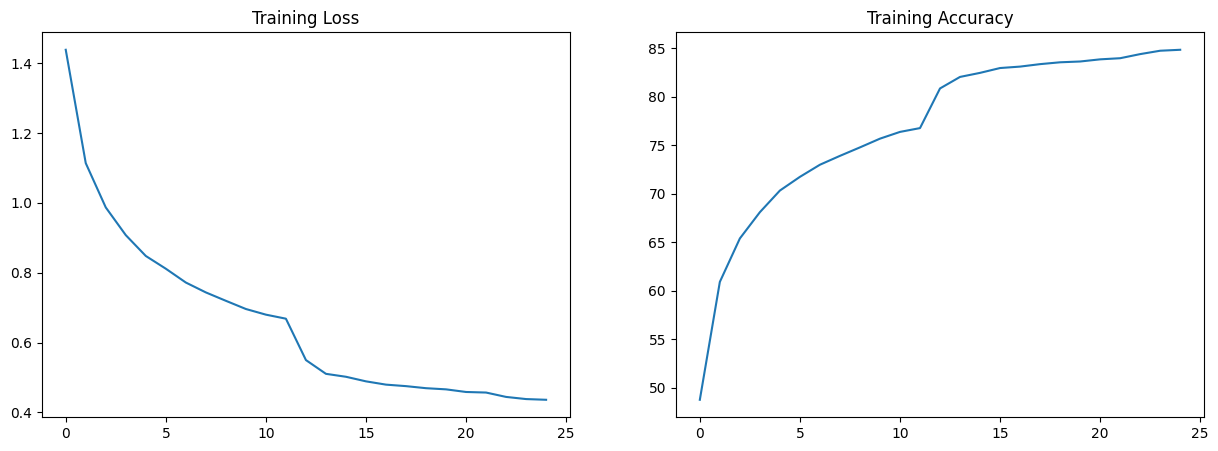

In [10]:
exp1.train.plot_stats()

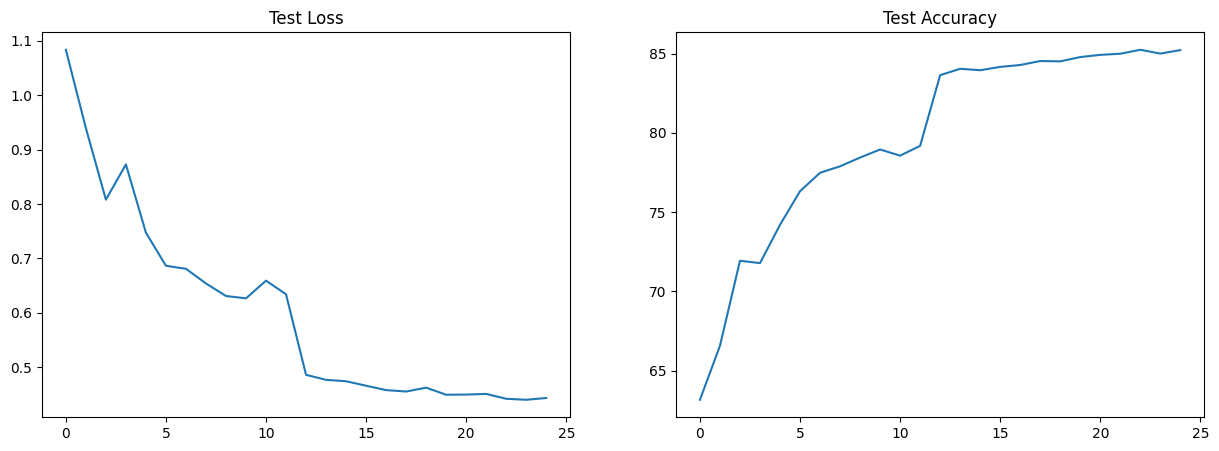

In [11]:
exp1.test.plot_stats()

Test:  Average loss: 0.4438, Accuracy: 85.22


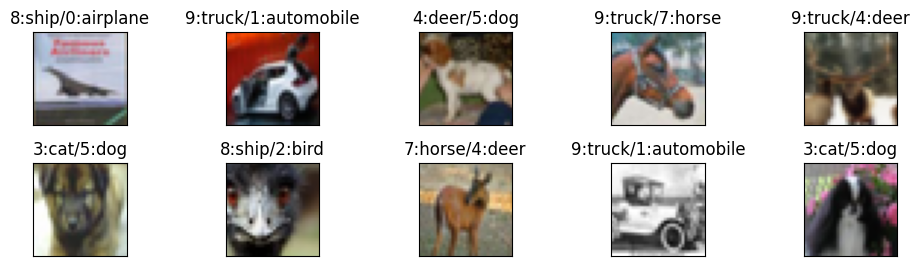

In [12]:
exp1.show_incorrect()